# <center> 120 years of Olympics History
## <center> This is an Analysis project using data from Maven Analytics titled "120 years of olympics History" 
<center> In this project I will do some basic analysis and build a map using geocoding 

## Cleaning the Data

In [1]:
#Importing the libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import sys
import emoji
plt.style.use('ggplot')


#installation
#!{sys.executable} -m pip install pycountry-convert
#!{sys.executable} -m pip install geopy
#!{sys.executable} -m pip install geopandas
#!{sys.executable} -m pip install folium


#Importing the dataset using CSV
df = pd.read_csv("C:\\Users\\Juhaina\\Documents\\GitHub\\Olympics-Analysis\\Olympic_Athletes\\athlete_events.csv",index_col=0)
# Viewing the first 10 rows of the dataset
df.head(6)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


- The first thing I noticed is that the current Index is not unique 
- The Age has a decimal point 
- Some of the Teams represent more than one country
- The games column is a concatenation of the Year and Season columns 
- A person can compete in multiple events and years etc

In [2]:
#Rest the index to ensure that every row is unique 
df.reset_index(inplace=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#Exploring the data types of the columns 
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [4]:
#Converting the format of age from float to int
df['Age'] = df['Age'].astype('Int64')

In [5]:
#Lets also delete the Games column because we wont be using it
df.drop('Games', axis=1, inplace=True)

In [6]:
#Checking if there are duplicate rows, we have 1385 duplicated rows in our dataset
df.loc[df.duplicated()]

# getting rid of the duplicates 
df.drop_duplicates(inplace=True)

In [7]:
#do we have any na's in the dataset? 
# The Age, Height and Weight Columns shouldnt be empty, but the Medal one is okay because not everyone got a medal
df.isna().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [8]:
# Lets check to see the the NAs in the Age column is because of missing records from the 1800's?

# Getting all the rows with no age recoded 
NullAge=df[df['Age'].isnull()]

# Grouping them by year 
NullAge.groupby(['Year'])['ID'].count()

# it seems like we having missing records as recent as 2008

Year
1896     163
1900     770
1904     274
1906     743
1908     637
1912     156
1920     845
1924    1103
1928     924
1932     305
1936     199
1948    1166
1952     277
1956     638
1960     221
1964      56
1968     118
1972      96
1976      52
1980     187
1984     216
1988     110
1992      44
1994       2
1996       8
1998       2
2000       1
2008       2
Name: ID, dtype: int64

## Analysing the Data

In [9]:
# Exploring the number of rows & columns 
df.shape

(269731, 14)

In [10]:
# lets checkout some basic info on the dataset
df.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.0,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.0,127.000000,25.000000,1896.000000
25%,34655.500000,21.0,168.000000,60.000000,1960.000000
50%,68233.000000,24.0,175.000000,70.000000,1988.000000
75%,102111.000000,28.0,183.000000,79.000000,2002.000000
max,135571.000000,97.0,226.000000,214.000000,2016.000000


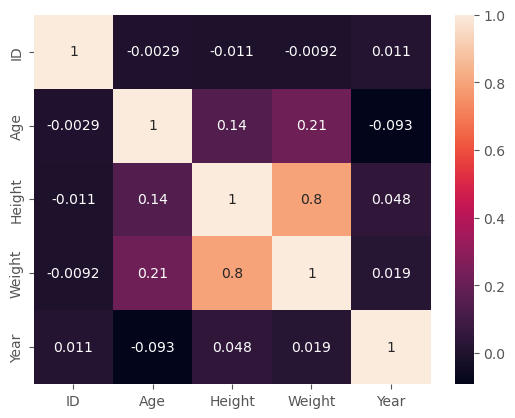

In [11]:
# Lets look at any correlations in the dataset
# looks like the only strong correlation is between height and weight 
corr=df.corr(numeric_only=True)

#Lets put that in a heat map
sns.heatmap(corr, annot=True)
plt.show()

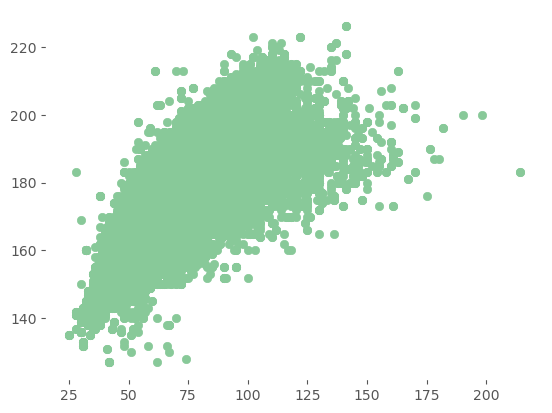

In [12]:
# lets look at this in a scatter plot 
ax = plt.axes()
ax.set_facecolor("white")
plt.scatter(x=df['Weight'], y=df['Height'], color = '#88c999')

C:\Users\Juhaina\AppData\Local\Temp\ipykernel_16968\1999276329.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  T= T.groupby('Age Group')[['F','M']].sum()


Text(0.5, 0, 'Percent (%)')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

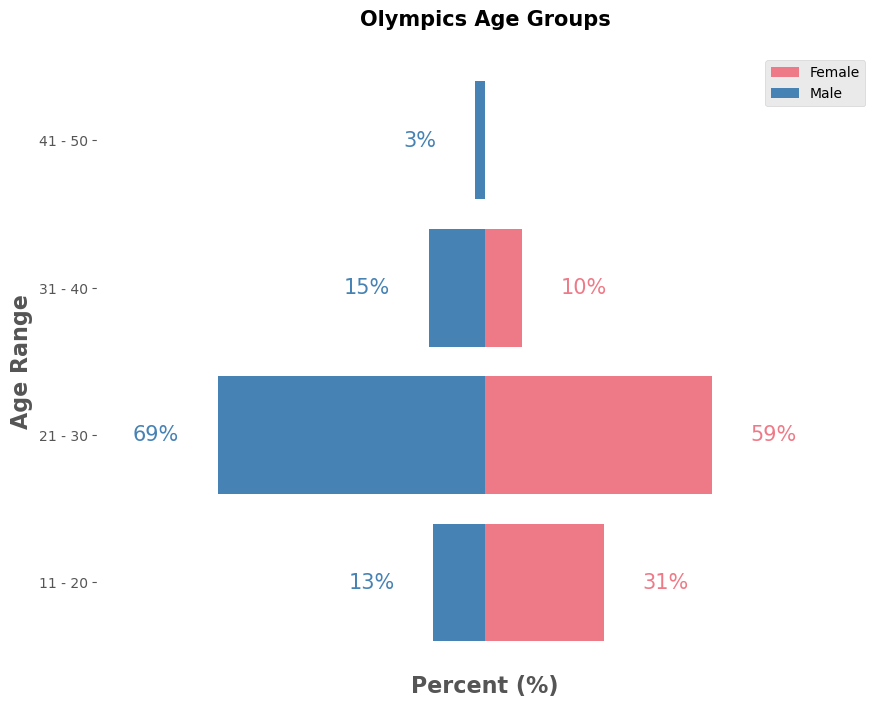

In [13]:
#Lets look at the percentage of males and females by age group
#The age groups that are not on the plot are less than 1% 

T=df.pivot_table(index='Age', columns=['Sex'],values='ID',aggfunc='count' ).reset_index().astype('Int64')

T['Age Group']=pd.cut(T['Age'], bins=[0,10,20,30,40,50,60,70,80,90,100], labels=['0 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60',
       '61 - 70', '71 - 80', '81 - 90', '91 - 100'])

T= T.groupby('Age Group')[['F','M']].sum()

T['M'] = T['M'].apply(lambda x: (x/T['M'].sum())).apply(lambda x: np.NaN if x < 0.01 else x)
T['F'] = T['F'].apply(lambda x: (x/T['F'].sum())).apply(lambda x: np.NaN if x < 0.01 else x)

T=T.reset_index()

T["Male_Left"] = -T["M"]
plt.figure(figsize=(10,8),facecolor='white')
plt.axes(facecolor='white')

plt.barh(T["Age Group"], T["F"], color="#ee7a87",label="Female");
plt.barh(T["Age Group"], T["M"], left=T["Male_Left"],color="#4682b4", label="Male");


for idx in range(len(T)):
    plt.text(x=T["Male_Left"][idx]-0.1, y=idx, s="{:.0%}".format(T["M"][idx]),
             ha="right", va="center",
             fontsize=15, color="#4682b4");
    plt.text(x=T["F"][idx]+0.1, y=idx, s="{:.0%}".format(T["F"][idx]),
             ha="left", va="center",
             fontsize=15, color="#ee7a87");
plt.xticks([], []);
plt.xlim(-1,1);
plt.legend(loc='upper right');
plt.ylabel("Age Range", fontsize=16, fontweight="bold")
plt.title("Olympics Age Groups", loc="center", pad=20, fontsize=15, fontweight="bold");
plt.grid(False);
plt.xlabel("Percent (%)", fontsize=16, fontweight="bold")


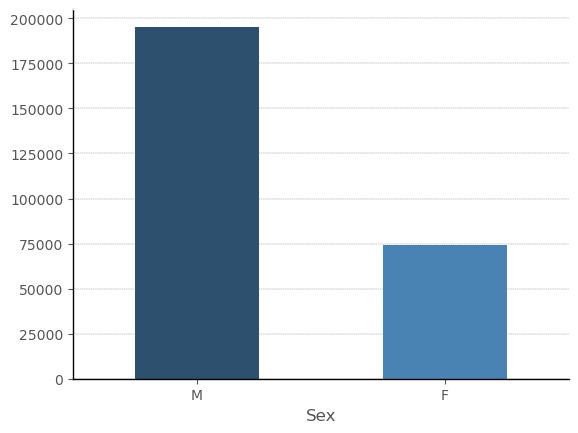

In [14]:
#lets look at sex,the number of females is a 1/3 of the number of males 
Sex=df['Sex'].value_counts().plot(kind='bar',color=tuple(['#2c506e','#4983b3']))
Sex.spines['bottom'].set_color('0')
Sex.spines['left'].set_color('0')
Sex.set_facecolor("white")
plt.xticks(rotation =360, fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Sex',fontsize=12)
plt.grid(axis = 'y',color = 'grey', linestyle = '--', linewidth = 0.3)

In [15]:
#Lets get the exact count of males and females by year, no females in 1896 and only 16 in 1904???
#However, its lovely to see the gap reducing
df.groupby(['Year','Sex'])['Sex'].count()

Year  Sex
1896  M       380
1900  F        33
      M      1865
1904  F        16
      M      1285
             ... 
2012  M      7105
2014  F      2023
      M      2868
2016  F      6223
      M      7465
Name: Sex, Length: 69, dtype: int64

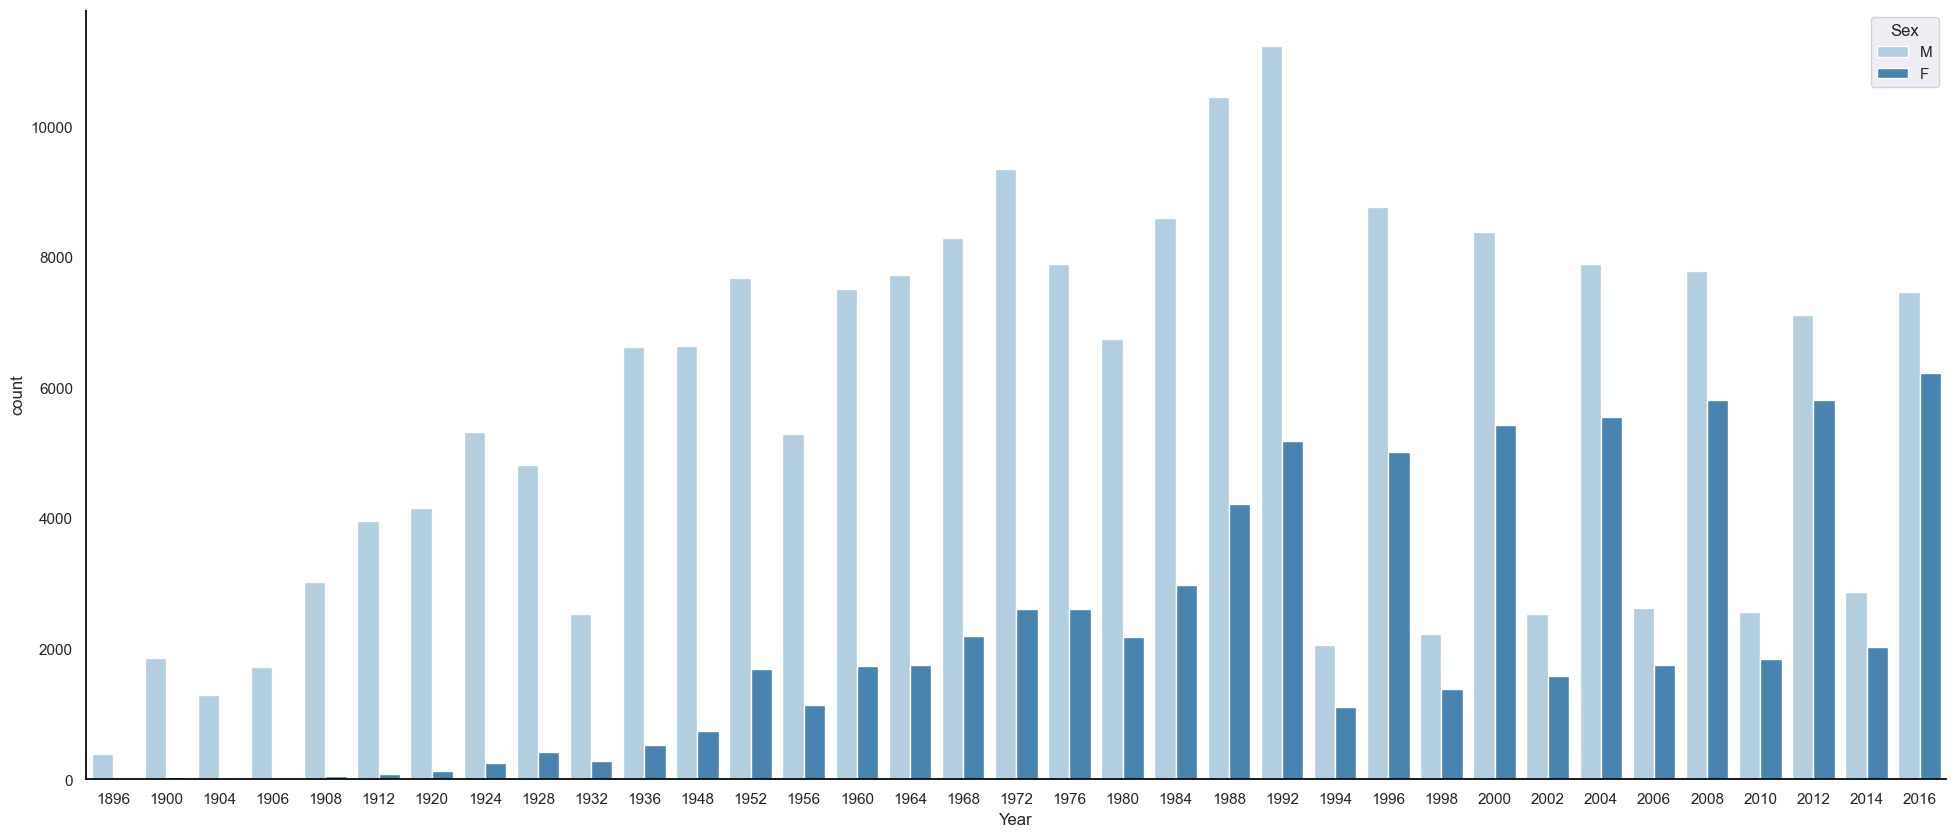

In [25]:
#Okay now lets see if the gender gap got better over the years
#Barely any females until 1912 sheeshhh..its getting better, not there yet.. maybe the male population is generally higher?
#A quick google search says that there are more men in the world
#but it looks like we have seasons?
AgebyYear= sns.countplot(x='Year',hue='Sex', data= df,palette='Blues')
AgebyYear.set_facecolor("white")
AgebyYear.spines['bottom'].set_color('0')
AgebyYear.spines['left'].set_color('0')
plt.xlabel('Year',fontsize=12)
sns.set(rc = {'figure.figsize':(24,10)})

In [17]:
# Now lets investigate the seasonality
# Only had summer seasons until 1920. 
# Both seasons in the same year between 1924 and 1992.
# Since 1994 they had both summer and winter seasons but not in the same year. 
# The Summer Games happen on the first year of an Olympiad and the Winter Games in the third year.
# and obviously the summer season has more olympians participating 
Seasons=df.pivot_table(index='Year', columns=['Season'],values='Sex',aggfunc='count' )
Seasons.head()

Season,Summer,Winter
Year,,
1896,380.0,NaN
1900,1898.0,NaN
1904,1301.0,NaN
1906,1733.0,NaN
1908,3069.0,NaN


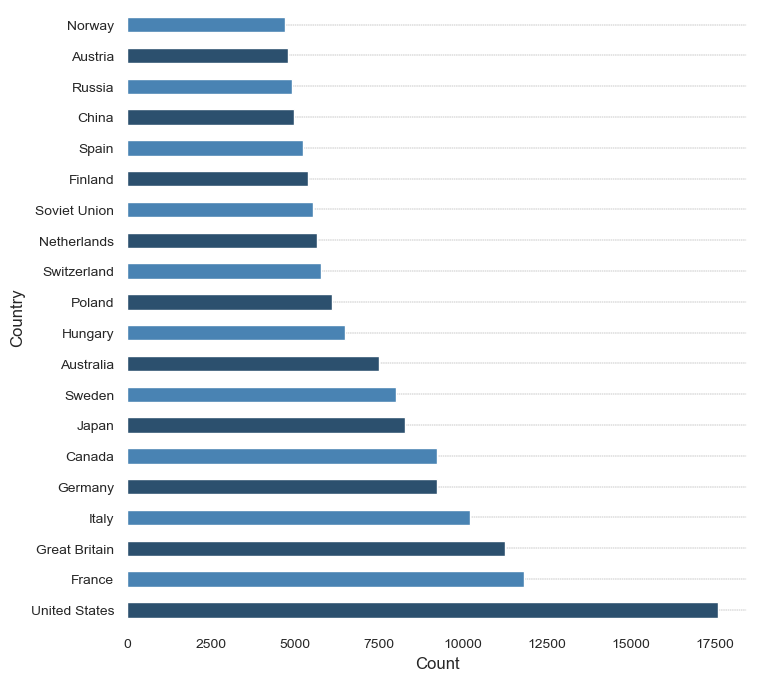

In [18]:
# Lets see which country sends the most atheletes by top 20
Countries = df.groupby(['Team'])['ID'].count().sort_values(ascending=False).head(20)
fig, ax = plt.subplots(figsize=(8,8 ))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')  
Countries.plot(kind='barh',color=tuple(['#2c506e','#4983b3']),ax=ax)
plt.xticks(rotation =360, fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Count',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.grid(axis = 'y',color = 'grey', linestyle = '--', linewidth = 0.3)
plt.show()

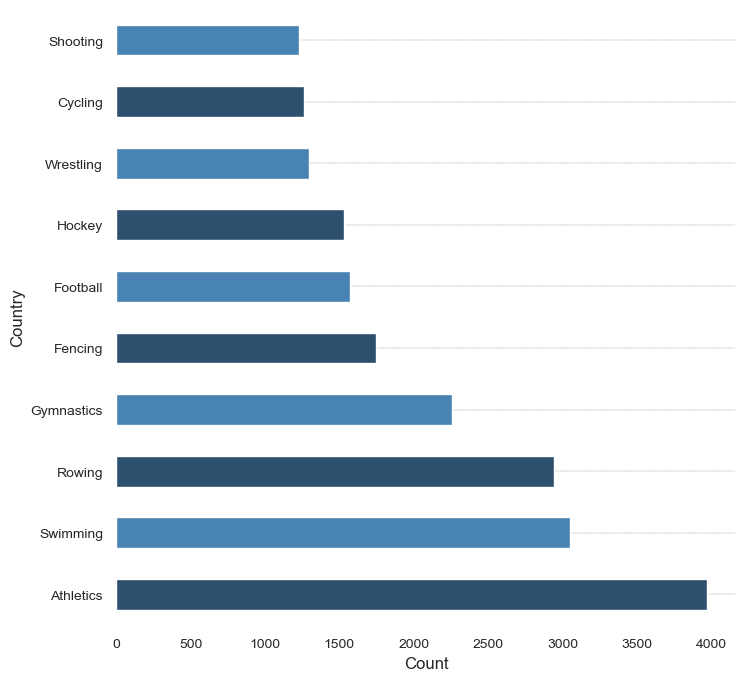

In [19]:
#Lets focus on the Summer Games and look at which sport wins the most medals 
sdf=df[df['Season'].str.contains('Summer') == True]
sdf=sdf.groupby(['Sport'])['Medal'].count().sort_values(ascending=False).head(10)
fig, ax = plt.subplots(figsize=(8,8 ))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')  
sdf.plot(kind='barh',color=tuple(['#2c506e','#4983b3']),ax=ax)
plt.xticks(rotation =360, fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Count',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.grid(axis = 'y',color = 'grey', linestyle = '--', linewidth = 0.3)
plt.show()

In [20]:
# Lets look at which countries won the most medals
# Emoji flags are not supported on Windows so i used medals instead of flags 
Medals= pd.pivot_table(data=df,index='Team',columns=['Medal'],values=['ID'], aggfunc='count')
Medals=Medals.reindex(Medals['ID'].sort_values(by='Gold', ascending=False).index)
Medals= Medals.iloc[[0,1,2]].astype('Int64')
Medals.columns=Medals.columns.droplevel(0)
Medals.columns.name = None  
Medals=Medals.reset_index()  
Medals.index = Medals.index + 1
feedback_to_emoji = {
    'United States': '🥇',
    'Soviet Union': '🥈',
    'Germany': '🥉'
}
Medals['Place'] = Medals['Team'].apply(lambda x: emoji.emojize(feedback_to_emoji[x]))
Medals = Medals[['Place','Team', 'Bronze', 'Silver', 'Gold']]
Medals.style.set_properties(**{'background-color': 'white', 'color': 'green'})

,Place,Team,Bronze,Silver,Gold
1,🥇,United States,1233,1512,2474
2,🥈,Soviet Union,677,716,1058
3,🥉,Germany,678,627,679


## Building the Map

In [21]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col.Team)
    except:
        cn_a2_code = 'Unknown'  
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code,cn_continent)

df['Codes'] = df.apply(get_continent, axis=1)
df[['Country','Continent']] = pd.DataFrame(df.Codes.tolist(), index= df.index)
df.drop('Codes', axis=1, inplace=True)

In [22]:
from geopy.geocoders import Nominatim
import pycountry

def get_coordinates(country):
    try:
        country_obj = pycountry.countries.get(name=country)
        geolocator = Nominatim(user_agent="Myapp")
        location = geolocator.geocode(country_obj.name)
        return location.latitude, location.longitude
    except:
        return np.nan

Maps=df[df['Country'].str.contains('Unknown') == False].dropna(subset=['Country','Medal']).drop_duplicates(["Name"])
Map=Maps.drop(Maps.index[500:])

Map[['latitude', 'longitude']] = Map['Team'].apply(get_coordinates).apply(pd.Series)
Map= Map.dropna(subset=['latitude','longitude'])

In [23]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster
map= folium.Map(tiles="cartodbpositron",zoom_start = 5)
from folium.plugins import Geocoder
Geocoder(add_marker=True).add_to(map)

for i in range(0,len(Map)):
    html=f"""
        <h1> {Map.iloc[i]['Team']}</h1>
        <ul>
            <li>Name: {Map.iloc[i]['Name']}</li>
            <li>Medal: {Map.iloc[i]['Medal']}</li>
            <li>Sport: {Map.iloc[i]['Sport']}</li>
            <li>Year: {Map.iloc[i]['Year']}</li>
        </ul>
        </p>
        """
    iframe = folium.IFrame(html=html, width=200, height=200)
    popup = folium.Popup(html=html, max_width=2650)
    folium.Marker(
        location=[Map.iloc[i]["latitude"],Map.iloc[i]["longitude"]],
        popup=popup).add_to(map)
map